In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the dataset
df = pd.read_csv("dummy data.csv")

# Basic Understanding of data

In [4]:
#to know how big dataset is
df.shape

(452, 8)

In [5]:
# to know how data looks like
df.sample(10)

,Wind_Speed,Power_Output,Voltage,Frequency,Reactive_Power,Stability,Power_Factor,Harmonic_Distortion
43,8.464507,414.489017,239.383979,49.865675,9.093544,Stable,0.977794,0.935175
65,6.560312,321.244577,229.048307,49.861618,8.056772,Stable,0.977245,0.421700
366,12.745102,315.308929,253.115315,47.694629,16.200771,Unstable,0.856199,7.071695
451,15.098041,373.519735,284.483472,46.361531,25.910484,Unstable,0.839159,5.190603
310,21.529645,532.635164,244.545817,48.892132,16.589139,Unstable,0.768921,6.274744
134,18.598400,460.117269,240.827233,48.335871,29.499088,Unstable,0.761767,5.495666
61,7.068540,346.131472,231.069900,50.315491,8.053862,Stable,0.979698,1.260288
448,14.916394,369.025856,257.399769,46.947012,21.347688,Unstable,0.861758,4.291877
252,9.563646,468.311496,225.106181,49.684722,12.416732,Stable,0.978783,2.025990
256,8.307450,406.798259,233.481032,50.069298,12.453866,Stable,0.985390,1.764196


In [6]:
# to know datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Wind_Speed           452 non-null    float64
 1   Power_Output         452 non-null    float64
 2   Voltage              452 non-null    float64
 3   Frequency            452 non-null    float64
 4   Reactive_Power       452 non-null    float64
 5   Stability            452 non-null    object 
 6   Power_Factor         452 non-null    float64
 7   Harmonic_Distortion  452 non-null    float64
dtypes: float64(7), object(1)
memory usage: 28.4+ KB


In [7]:
# to check missing values
df.isnull().sum()

Wind_Speed             0
Power_Output           0
Voltage                0
Frequency              0
Reactive_Power         0
Stability              0
Power_Factor           0
Harmonic_Distortion    0
dtype: int64

In [8]:
# to know how data looks mathematically
df.describe()

,Wind_Speed,Power_Output,Voltage,Frequency,Reactive_Power,Power_Factor,Harmonic_Distortion
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,11.266682,383.432754,239.296937,49.130875,14.994731,0.899333,3.150240
std,4.846727,97.592724,16.567141,1.468886,7.737113,0.100074,2.212423
min,2.034931,5.000000,100.000000,44.169118,-1.625858,0.500000,0.035524
25%,7.625331,315.240337,228.431671,48.186739,9.575388,0.810993,1.433029
50%,9.679617,384.112095,234.149353,49.863696,12.063967,0.968009,2.185971
75%,14.800662,444.920649,249.413874,50.084898,19.342084,0.982068,5.018040
max,35.000000,769.063291,300.000000,55.000000,50.000000,1.050000,10.059129


In [9]:
# to know duplicate values
df.duplicated().sum()

0

# EDA

In [11]:
df['Stability'].value_counts()

Stability
Stable      251
Unstable    201
Name: count, dtype: int64

In [12]:
df.nunique()

Wind_Speed             452
Power_Output           452
Voltage                452
Frequency              452
Reactive_Power         452
Stability                2
Power_Factor           452
Harmonic_Distortion    452
dtype: int64

In [13]:
df['Stability'].unique()

array(['Unstable', 'Stable'], dtype=object)

# Visualization

<Axes: xlabel='Stability', ylabel='count'>

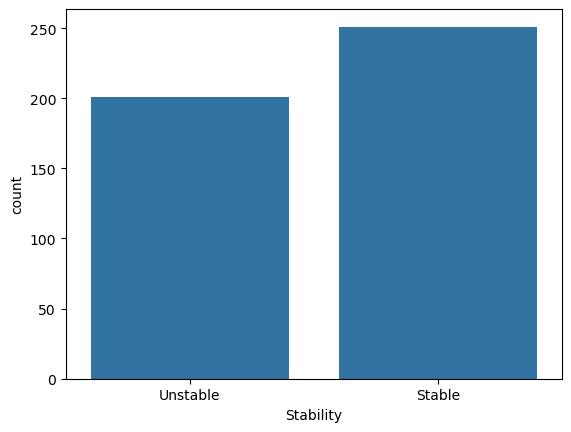

In [15]:
#Univariate
# categorical
sn.countplot(df, x= "Stability" )

<Axes: xlabel='Wind_Speed', ylabel='Count'>

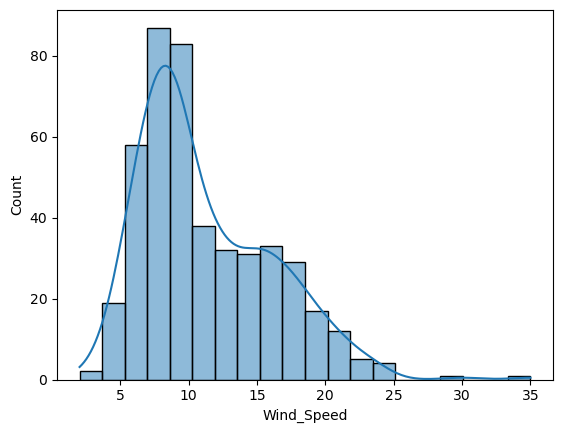

In [16]:
# numerical 
sn.histplot(x='Wind_Speed',kde=True, bins=20, data=df)

<Axes: xlabel='Power_Output', ylabel='Count'>

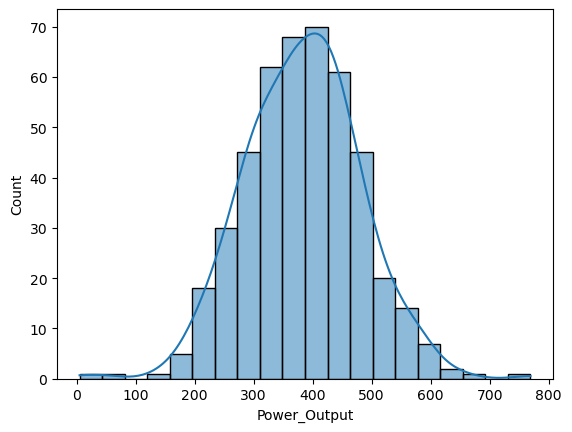

In [17]:
sn.histplot(x='Power_Output',kde=True, bins=20, data=df)

<Axes: xlabel='Voltage', ylabel='Count'>

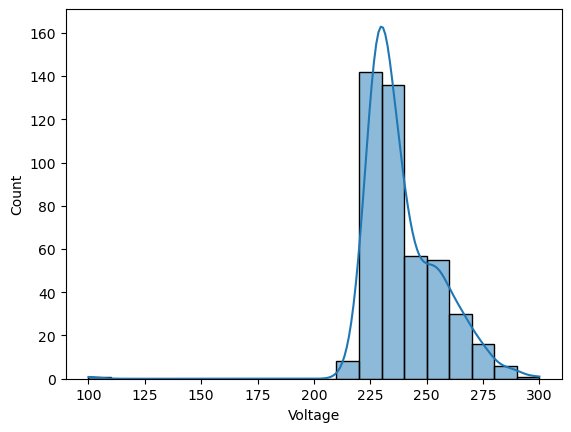

In [18]:
sn.histplot(x='Voltage',kde=True, bins=20, data=df)

<Axes: xlabel='Frequency', ylabel='Count'>

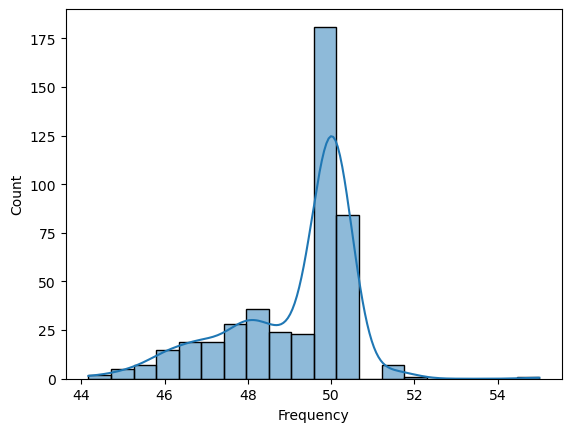

In [19]:
sn.histplot(x='Frequency',kde=True, bins=20, data=df)

<Axes: xlabel='Reactive_Power', ylabel='Count'>

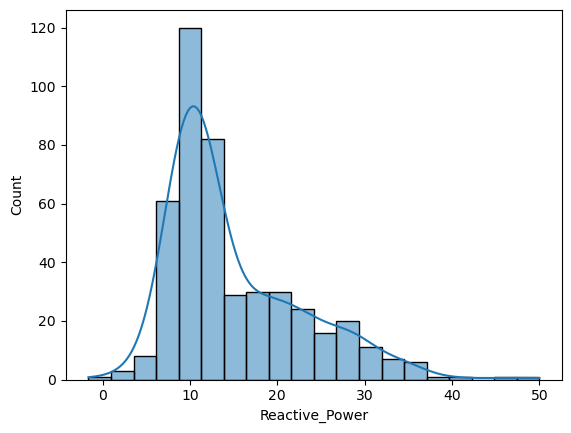

In [20]:
sn.histplot(x='Reactive_Power',kde=True, bins=20, data=df)

<Axes: xlabel='Power_Factor', ylabel='Count'>

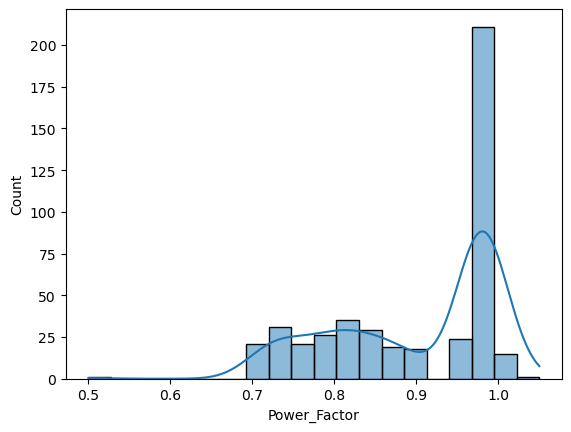

In [21]:
sn.histplot(x='Power_Factor',kde=True, bins=20, data=df)

<Axes: xlabel='Harmonic_Distortion', ylabel='Count'>

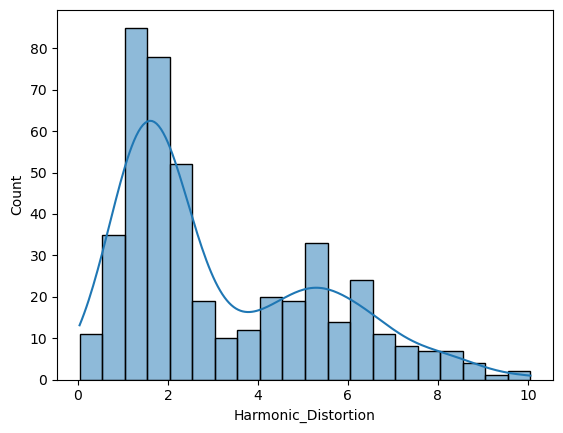

In [22]:
sn.histplot(x='Harmonic_Distortion',kde=True, bins=20, data=df)

<Axes: xlabel='Wind_Speed', ylabel='Stability'>

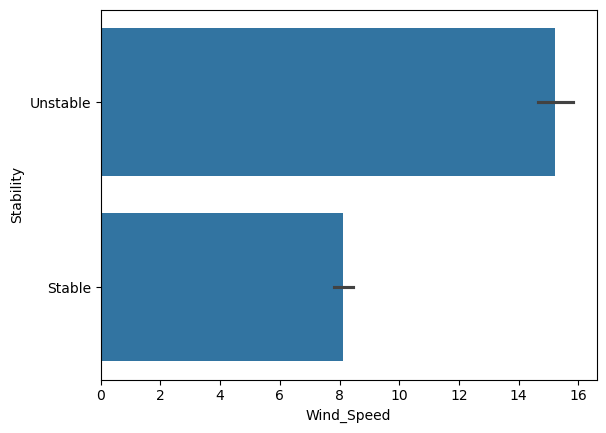

In [23]:
#Multivariate
sn.barplot(y='Stability',x='Wind_Speed',data=df)

<Axes: xlabel='Power_Output', ylabel='Stability'>

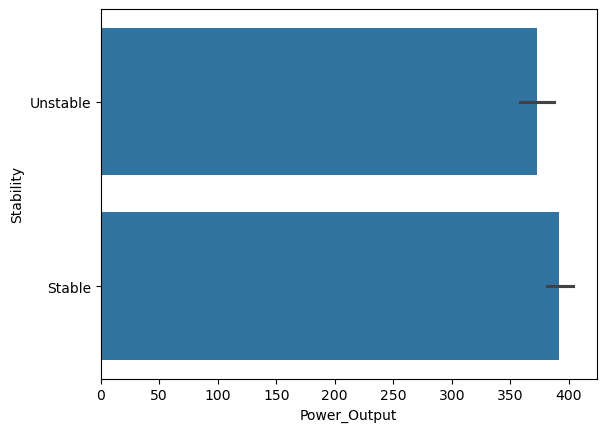

In [24]:
sn.barplot(y='Stability',x='Power_Output',data=df)

<Axes: xlabel='Voltage', ylabel='Stability'>

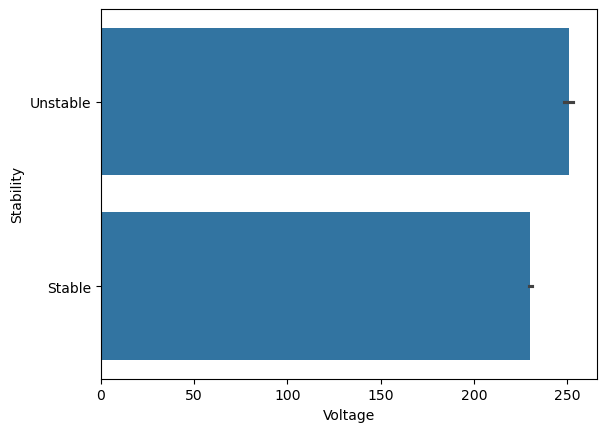

In [25]:
sn.barplot(y='Stability',x='Voltage',data=df)

<Axes: xlabel='Frequency', ylabel='Stability'>

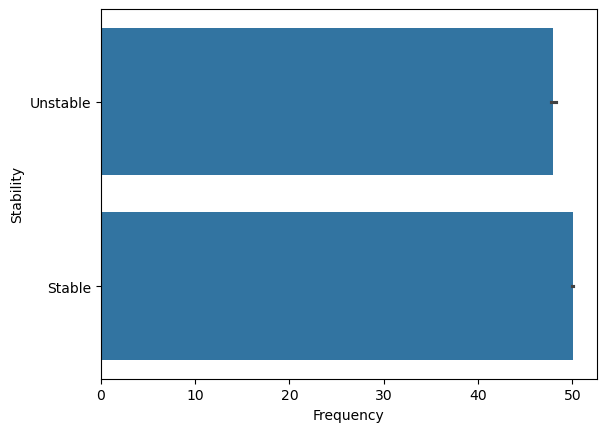

In [26]:
sn.barplot(y='Stability',x='Frequency',data=df)

<Axes: xlabel='Reactive_Power', ylabel='Stability'>

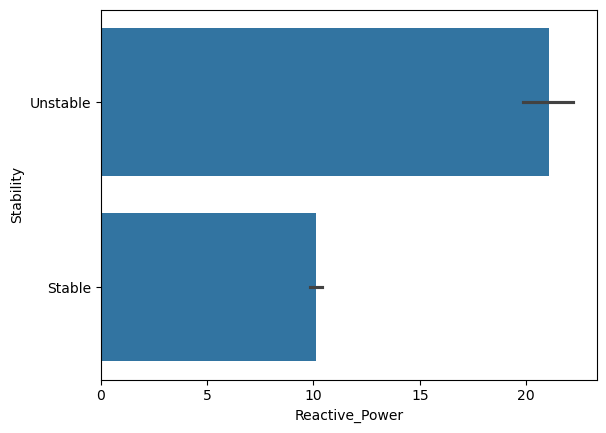

In [27]:
sn.barplot(y='Stability',x='Reactive_Power',data=df)

<Axes: xlabel='Power_Factor', ylabel='Stability'>

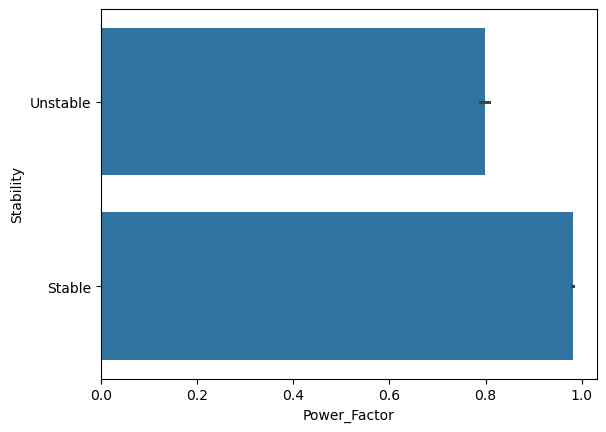

In [28]:
sn.barplot(y='Stability',x='Power_Factor',data=df)

<Axes: xlabel='Harmonic_Distortion', ylabel='Stability'>

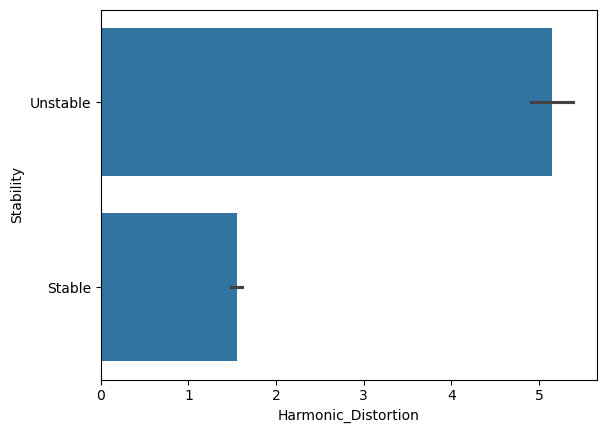

In [29]:
sn.barplot(y='Stability',x='Harmonic_Distortion',data=df)

<Axes: xlabel='Stability', ylabel='Wind_Speed'>

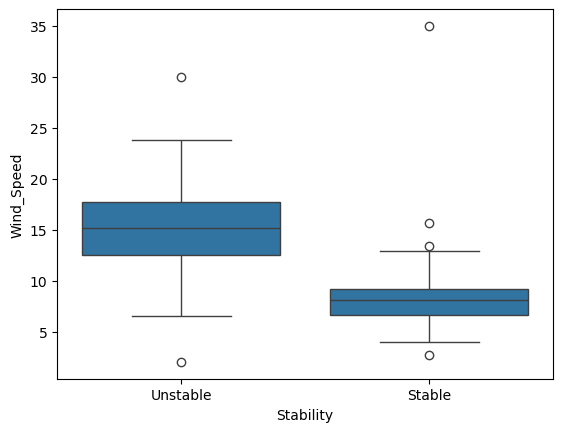

In [30]:
#outlier
sn.boxplot(y='Wind_Speed', x='Stability',data=df)

<Axes: xlabel='Stability', ylabel='Power_Output'>

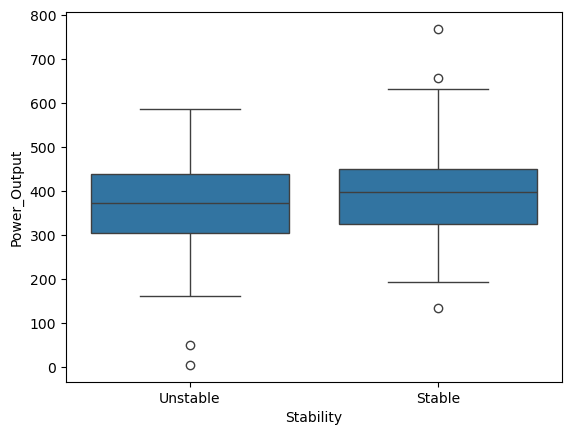

In [31]:
sn.boxplot(y='Power_Output', x='Stability',data=df)

<Axes: xlabel='Stability', ylabel='Voltage'>

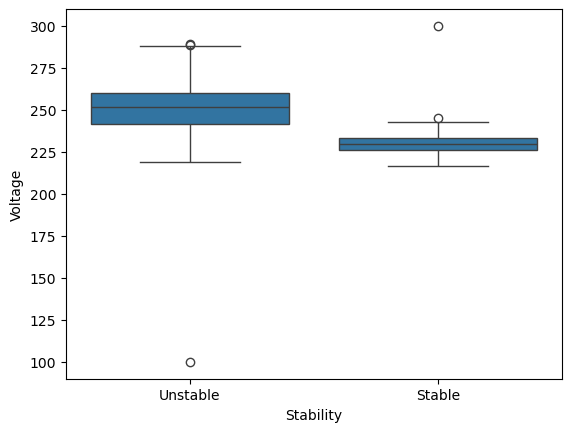

In [32]:
sn.boxplot(y='Voltage', x='Stability',data=df)

<Axes: xlabel='Stability', ylabel='Frequency'>

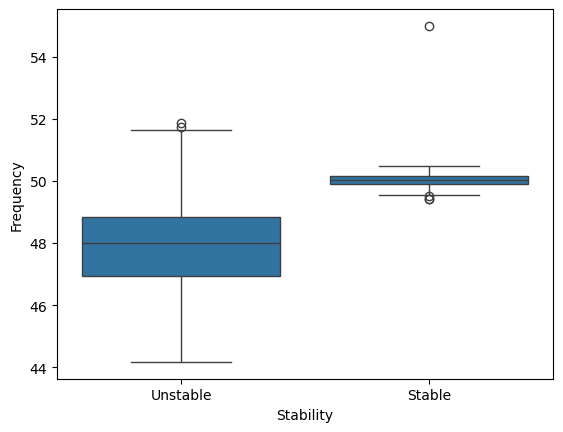

In [33]:
sn.boxplot(y='Frequency', x='Stability',data=df)

<Axes: xlabel='Stability', ylabel='Reactive_Power'>

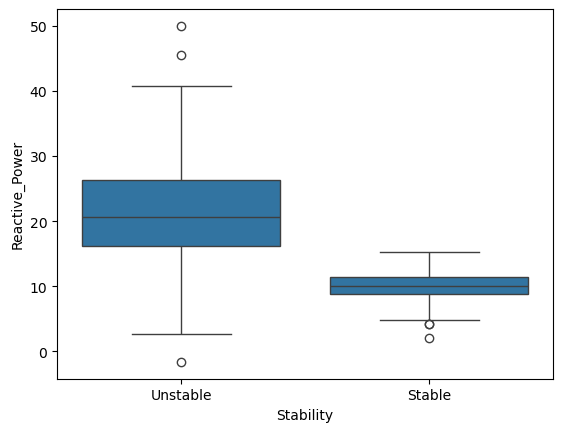

In [34]:
sn.boxplot(y='Reactive_Power', x='Stability',data=df)

<Axes: xlabel='Stability', ylabel='Power_Factor'>

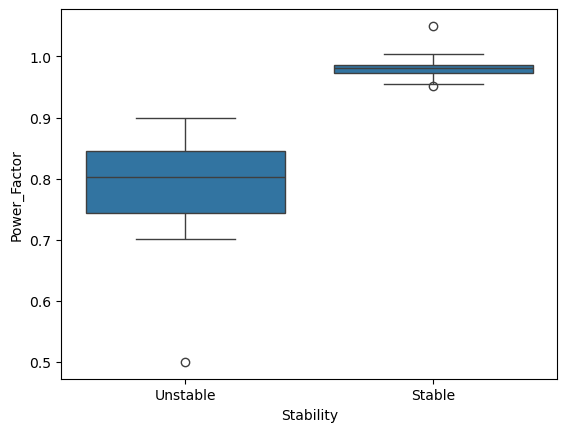

In [35]:
sn.boxplot(y='Power_Factor', x='Stability',data=df)

<Axes: xlabel='Stability', ylabel='Harmonic_Distortion'>

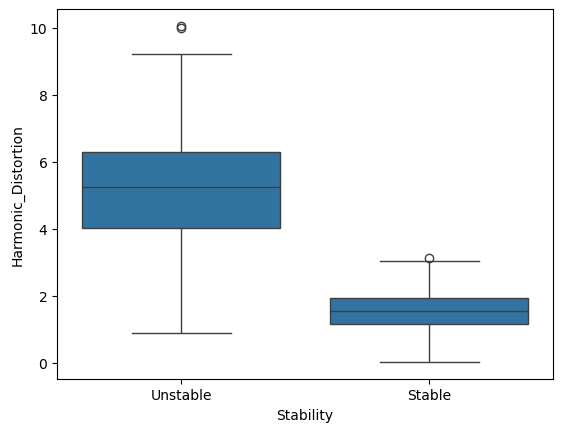

In [36]:
sn.boxplot(y='Harmonic_Distortion', x='Stability',data=df)

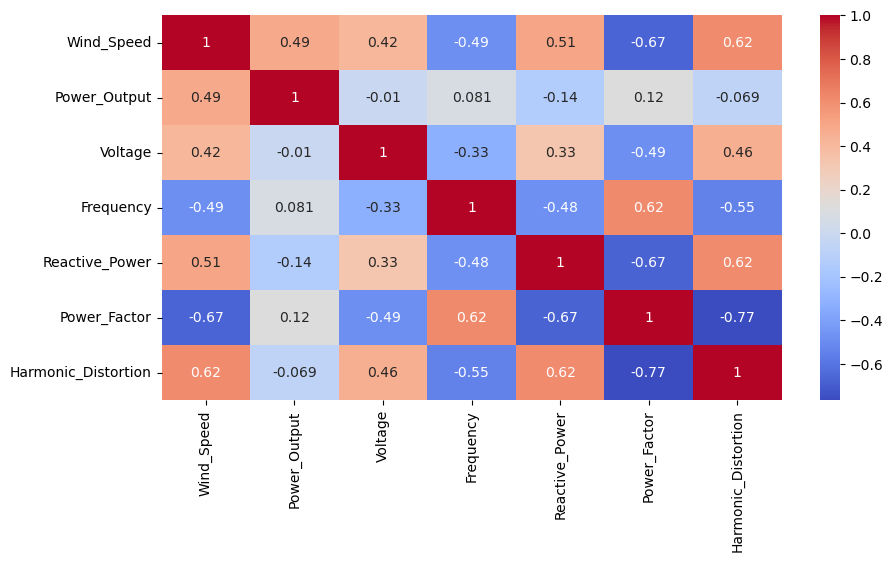

In [37]:
#correlation matrix
categorical_col = ['Stability']
dfn = df.drop(columns =categorical_col)

corr_matrix = dfn.corr()
plt.figure(figsize=(10, 5))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


# Modelling

In [86]:
# Encoding categorical column
df.head(3)

,Wind_Speed,Power_Output,Voltage,Frequency,Reactive_Power,Stability,Power_Factor,Harmonic_Distortion
0,18.301665,452.776181,267.239100,47.557575,30.375956,1,0.887059,4.208369
1,5.884578,288.155340,222.888731,49.899589,10.598585,0,0.981543,1.066690
2,7.061051,345.764738,239.823626,49.938444,9.969380,0,1.002411,3.130246


In [88]:
label_encoder = LabelEncoder()
df['Stability'] = label_encoder.fit_transform(df['Stability'])
df.head(3)

,Wind_Speed,Power_Output,Voltage,Frequency,Reactive_Power,Stability,Power_Factor,Harmonic_Distortion
0,18.301665,452.776181,267.239100,47.557575,30.375956,1,0.887059,4.208369
1,5.884578,288.155340,222.888731,49.899589,10.598585,0,0.981543,1.066690
2,7.061051,345.764738,239.823626,49.938444,9.969380,0,1.002411,3.130246


In [84]:
# Feature selection
X = df.drop('Stability', axis=1)
y = df['Stability']

In [100]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [94]:
X_train.shape

(316, 7)

In [96]:
y_train.shape

(316,)

In [98]:
y_test.shape

(136,)

In [102]:
# scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [108]:
X_train_scaled

array([[-0.54327311,  0.31767353, -0.36848435, ..., -0.61029734,
         0.68986679, -0.60900137],
       [-0.14412298,  1.24157455, -0.66478628, ..., -0.4008087 ,
         0.89037548, -0.37616034],
       [-0.72034269, -0.09218421, -0.54846378, ..., -0.18599869,
         0.82189667, -0.53829067],
       ...,
       [ 1.64964747,  0.86577154,  0.65370384, ...,  0.57014077,
        -1.5651708 , -0.79722758],
       [-1.4458288 , -1.77144552, -0.2372734 , ..., -0.83072386,
         0.82899988, -0.56349363],
       [-0.17711247,  1.16521475, -0.91659496, ..., -0.80538164,
         0.67762571, -0.65291458]])

In [110]:
X_test_scaled

array([[ 9.47537532e-01,  4.47095942e-02,  2.50737719e+00,
        -9.62110634e-01,  1.25900196e+00, -1.53350782e+00,
         1.59834347e+00],
       [ 2.09116960e+00,  1.38209667e+00,  2.82179047e-01,
        -4.05691394e-01,  1.84523768e+00, -5.77490394e-02,
         5.83699077e-01],
       [ 1.57162323e+00,  7.74528362e-01,  3.07179824e-01,
         4.40908924e-01,  1.11022386e+00, -8.91224535e-01,
         2.84606721e+00],
       [-6.69939308e-01,  2.44830056e-02, -3.16983437e-01,
         5.62311257e-01, -3.95586732e-01,  7.84940149e-01,
        -4.82526051e-01],
       [-3.05460223e-01,  8.68131994e-01,  1.16225665e-03,
         4.69840302e-01, -7.93012569e-01,  7.89825863e-01,
        -4.23379436e-01],
       [-1.23717004e+00, -1.28846923e+00, -5.62674014e-01,
         6.30449082e-01, -4.78964793e-01,  6.78515264e-01,
        -6.11500354e-01],
       [-8.09469235e-01, -2.98482800e-01, -5.79637546e-01,
         6.41925584e-01, -1.96751597e-01,  7.53075241e-01,
        -6.6623051

In [112]:
# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)


In [114]:
# Fit models
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [116]:
# Predict and evaluate for both models
y_pred_dt = decision_tree.predict(X_test_scaled)
y_pred_rf = random_forest.predict(X_test_scaled)

In [118]:
# Gather metrics for both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_report_dt = classification_report(y_test, y_pred_dt)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 1.0
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        67

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        67

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

